In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = '/Users/kaivalyasatav/Documents/Cognifyz/Dataset .csv'

In [3]:
data = pd.read_csv(filepath)

In [4]:
sns.set(style='whitegrid')

<Axes: xlabel='Aggregate rating', ylabel='Count'>

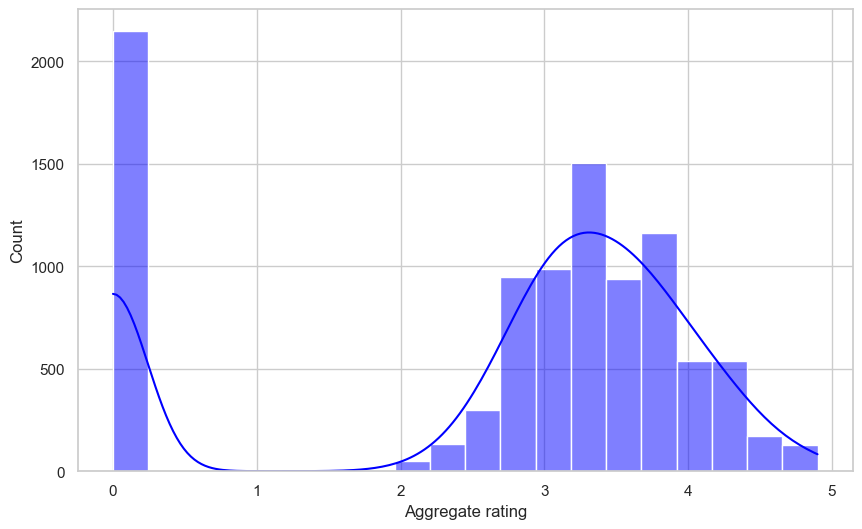

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data['Aggregate rating'],bins=20,kde=True,color='blue')

Text(0.5, 1.0, 'Distribution of Restaurant Ratings')

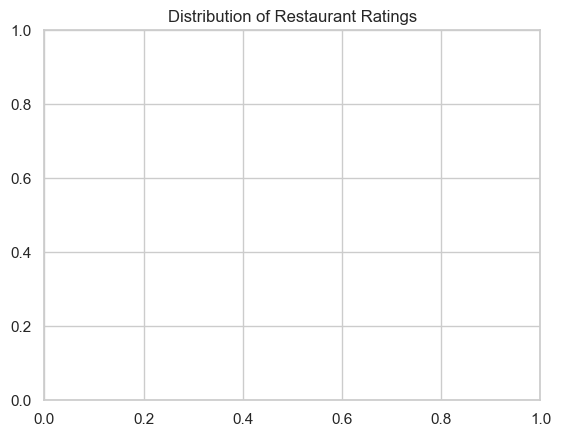

In [6]:
plt.title("Distribution of Restaurant Ratings")

Text(0.5, 0, 'Ratings')

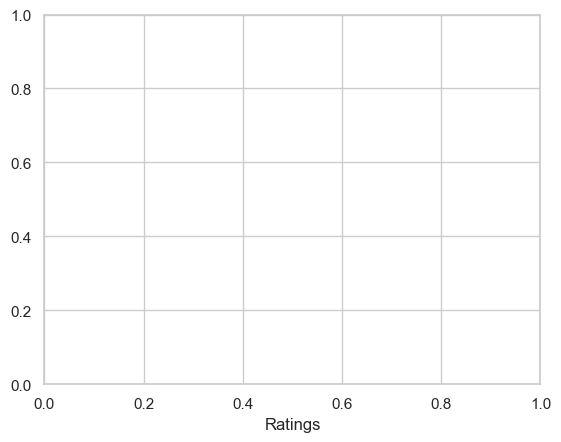

In [7]:
plt.xlabel("Ratings")

Text(0, 0.5, 'Frequency')

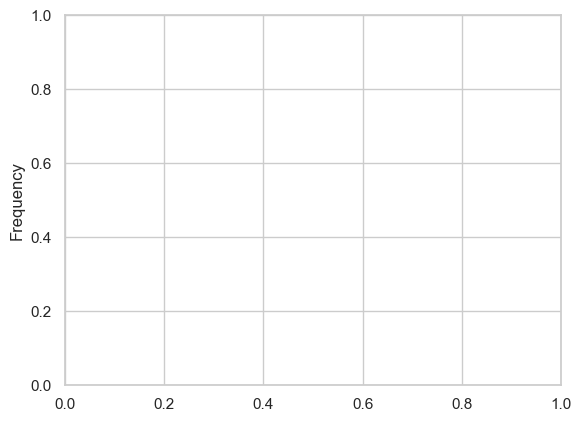

In [8]:
plt.ylabel("Frequency")

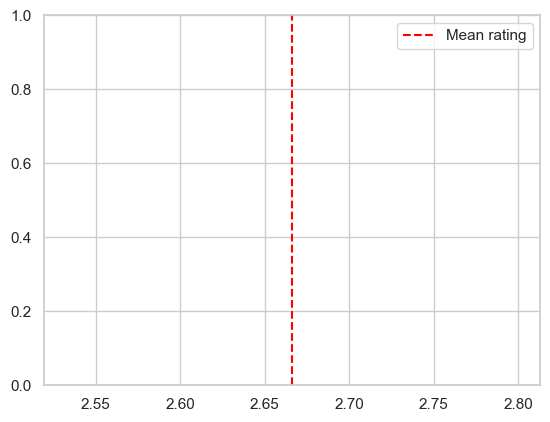

In [9]:
plt.axvline(data['Aggregate rating'].mean(),color = "red",linestyle = '--',label = "Mean rating")
plt.legend()
plt.show()

In [10]:
data['Cuisines'] = data['Cuisines'].str.split(', ')
cuisines_exploded = data.explode('Cuisines')

In [11]:
avg_rating_by_cuisine = cuisines_exploded.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
avg_rating_by_cuisine.columns = ['Cuisine', 'Average Rating']

/Users/kaivalyasatav/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


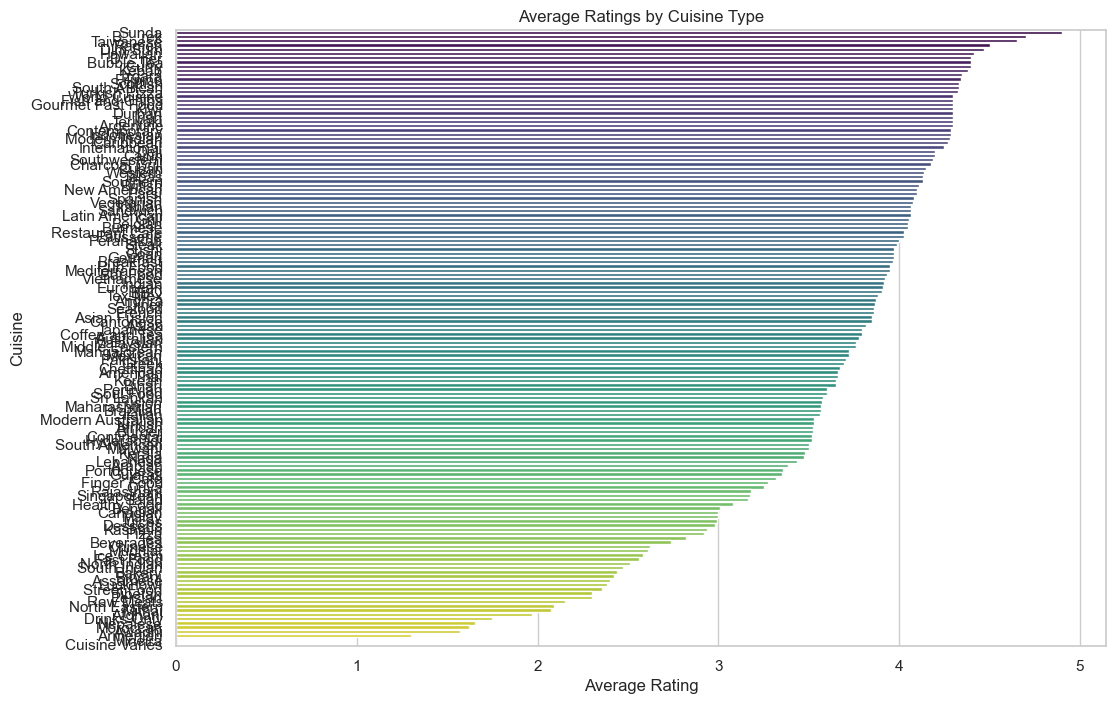

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Rating', y='Cuisine', data=avg_rating_by_cuisine.sort_values('Average Rating', ascending=False), palette='viridis')
plt.title('Average Ratings by Cuisine Type')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

In [14]:
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().reset_index()
avg_rating_by_city.columns = ['City', 'Average Rating']

/Users/kaivalyasatav/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


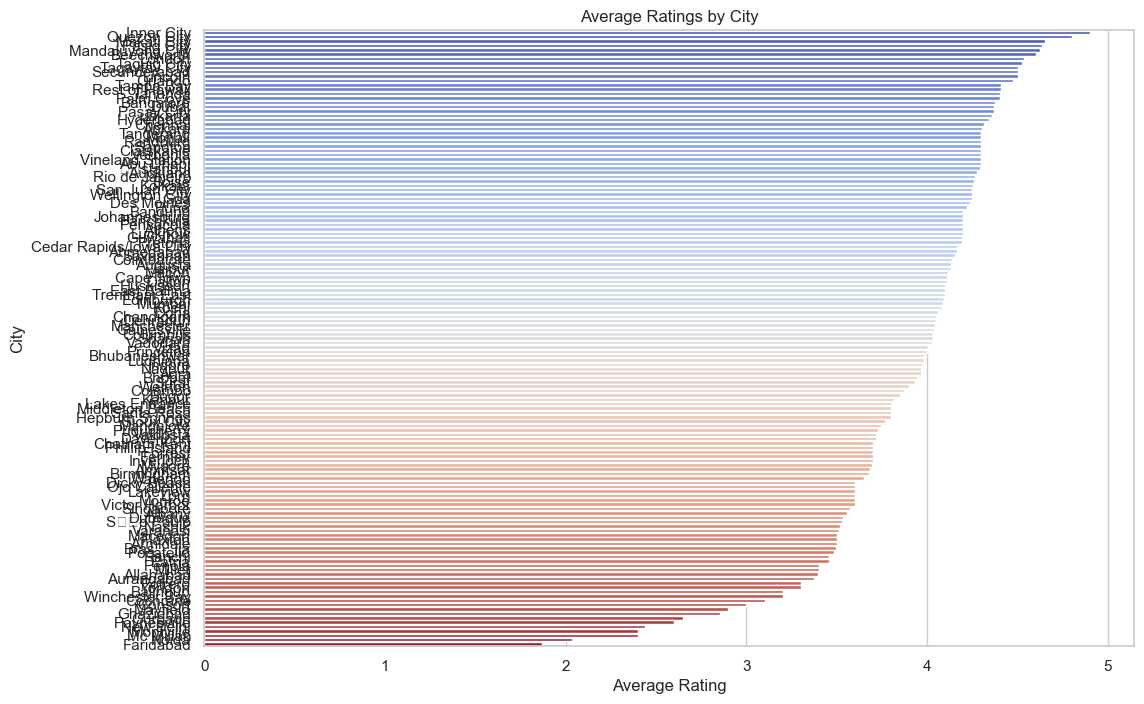

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Rating', y='City', data=avg_rating_by_city.sort_values('Average Rating', ascending=False), palette='coolwarm')
plt.title('Average Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

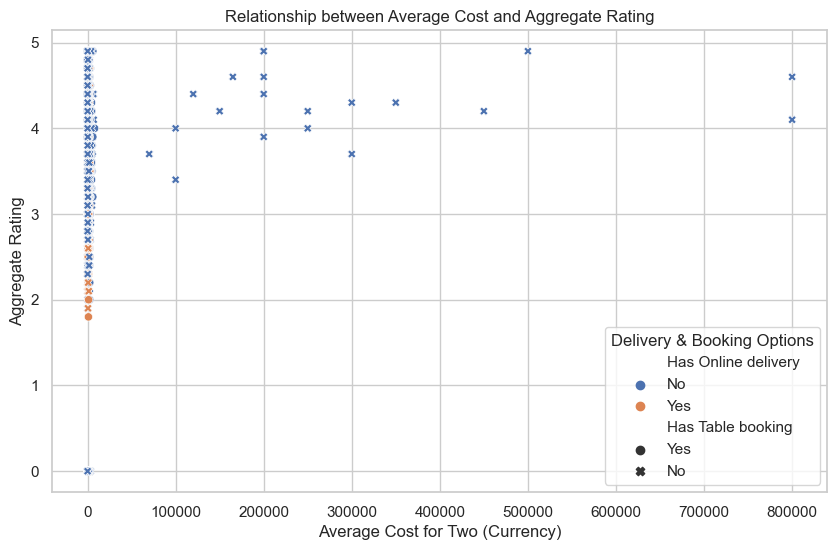

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=data, hue='Has Online delivery', style='Has Table booking', palette='deep')
plt.title('Relationship between Average Cost and Aggregate Rating')
plt.xlabel('Average Cost for Two (Currency)')
plt.ylabel('Aggregate Rating')
plt.legend(title='Delivery & Booking Options')
plt.show()